In [1]:
from google.colab import files


uploaded = files.upload()

Saving Happiness score.csv to Happiness score.csv



# **Libraries**

In [2]:

import io
# for basic operations
import numpy as np
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from scipy.stats import pointbiserialr
import seaborn as sns

from scipy.stats import chi2_contingency

from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

from scipy.stats import pointbiserialr, chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Read & describe The ***File***

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Happiness score.csv']))
print(df)


         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Happiness score.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.7+ KB


In [6]:
df = pd.read_csv('Happiness score.csv')

# lets check the shape of the dataset
df.shape

(158, 11)

In [7]:
# Descriptive Statistics
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


Heat map

* starting with it to see the correlations from the begining

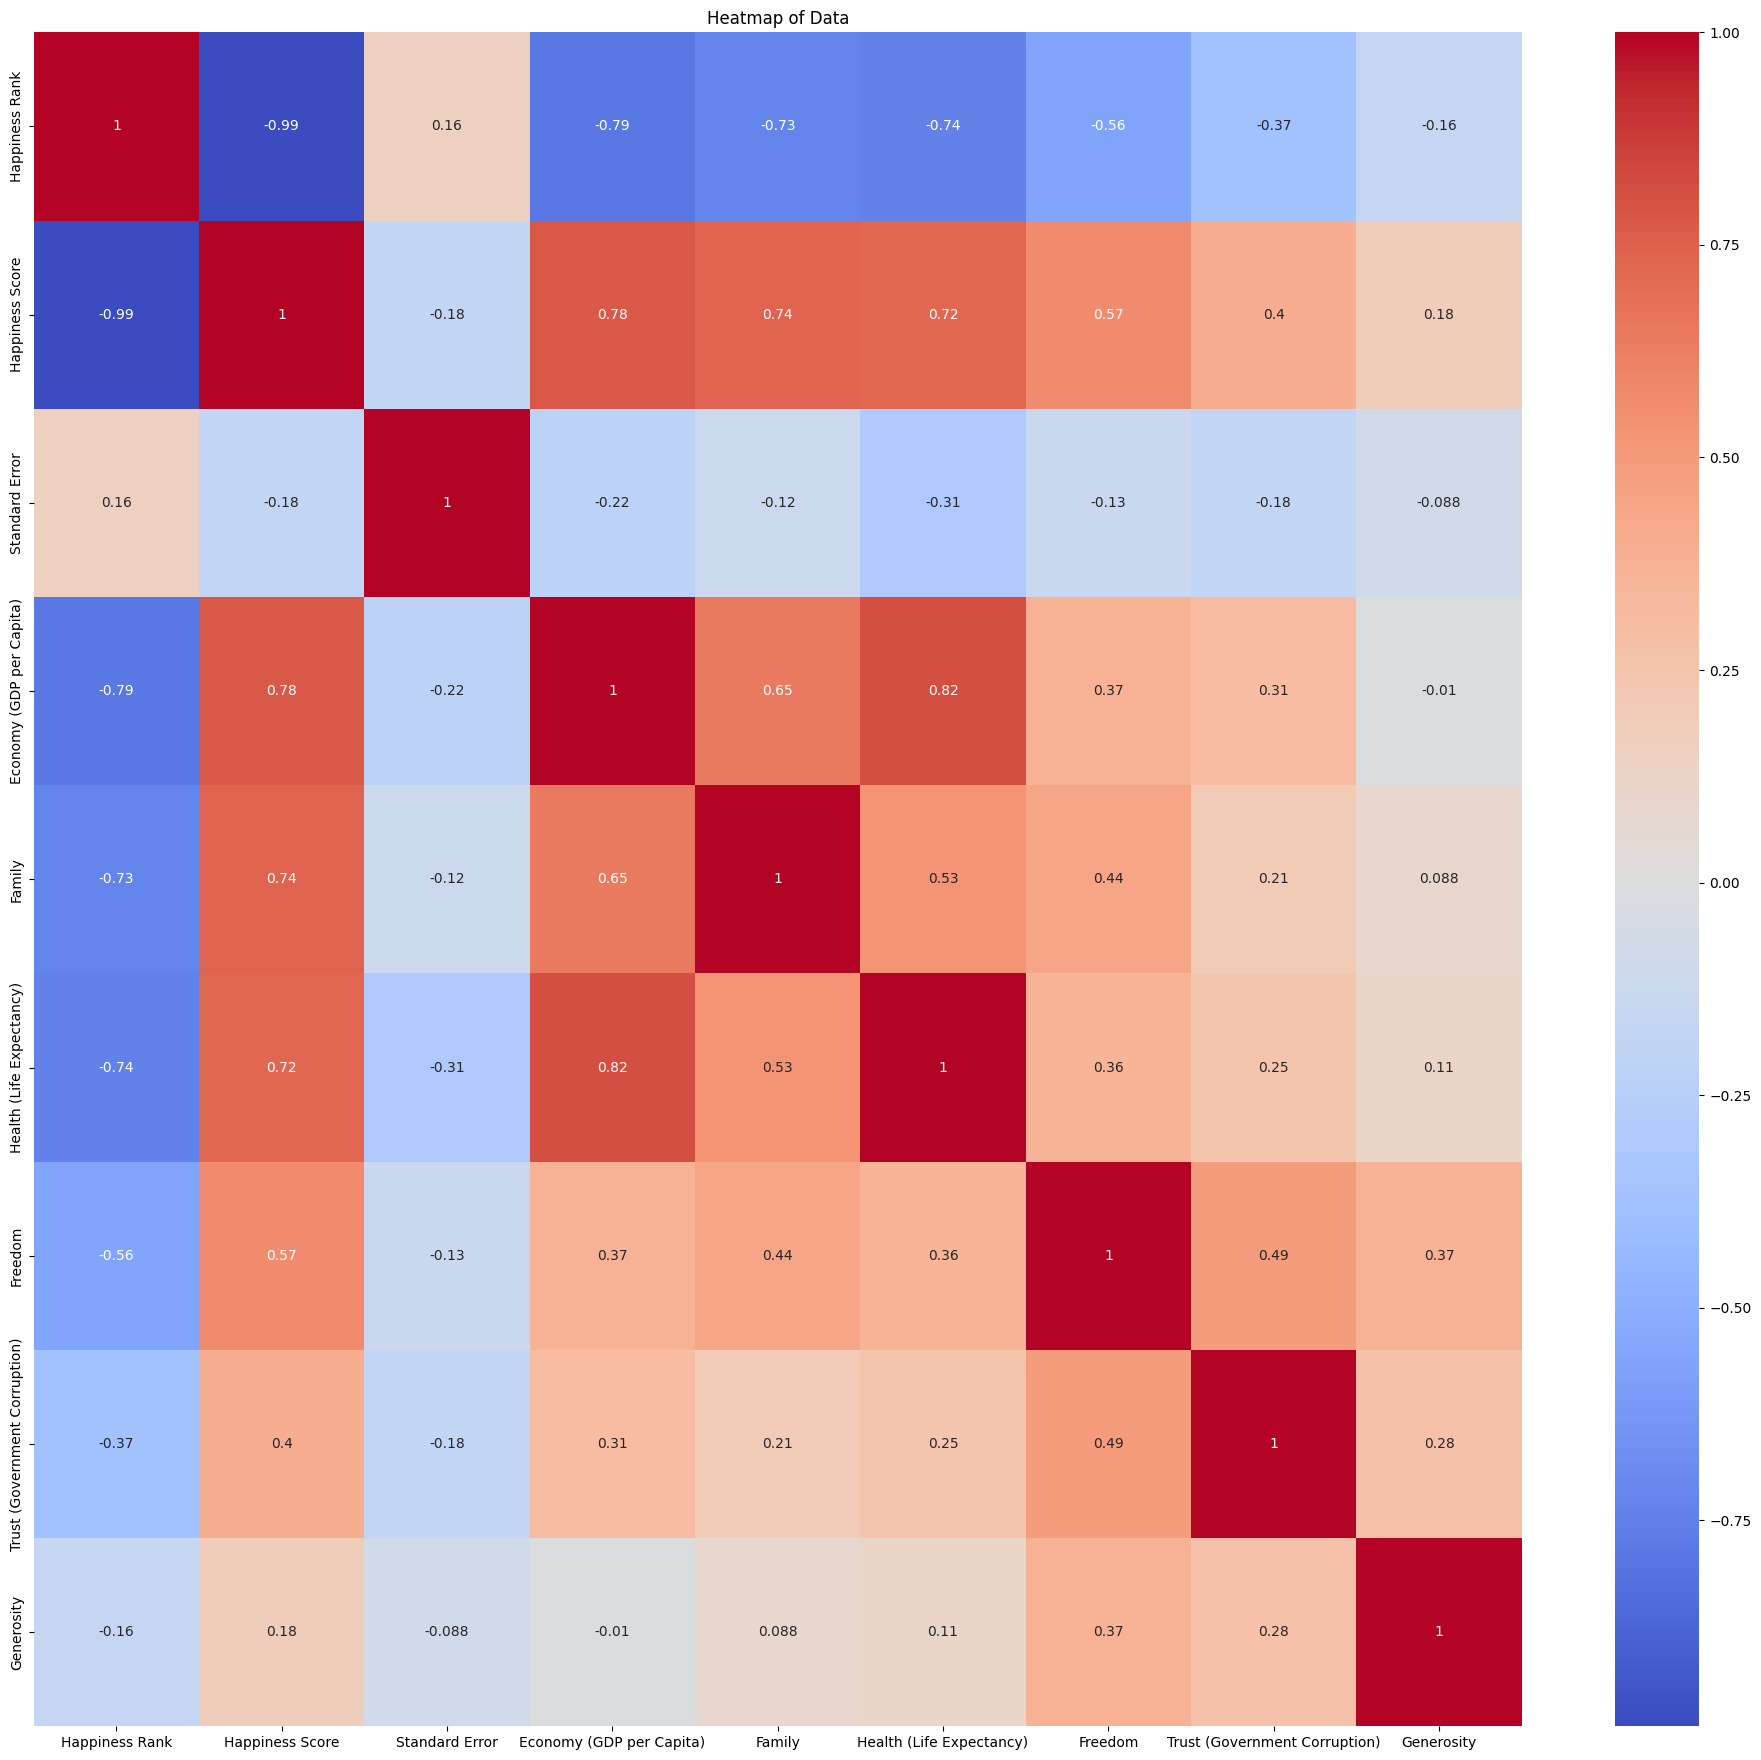

In [8]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create a larger plot
plt.figure(figsize=(24, 22))

# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

# Set the title
plt.title('Heatmap of Data')

# Display the plot
plt.show()


# Data Cleaning

In [9]:
# Checking for missing values and data types
data.info()

# Checking for statistical summary to understand the distribution and potential outliers
data.describe()

# If there are missing values, we need to handle them. Let's check for missing values explicitly
missing_values = data.isnull().sum()
missing_values

# Display the summary statistics of the dataset to understand the distribution and identify potential outliers
data.describe()

# Removing any duplicates if present
data = data.drop_duplicates()

# Verify the data cleaning steps
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15

In [10]:
# Load the dataset
file_path = 'Happiness score.csv'
data = pd.read_csv(file_path)

# Checking for missing values and data types
print(data.info())

# Checking for statistical summary to understand the distribution and potential outliers
print(data.describe())

# Removing any duplicates if present
data = data.drop_duplicates()

# Verify the data cleaning steps
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.7+ KB
None
       Happiness Rank  Happiness Score  Standar

# Data Visualization

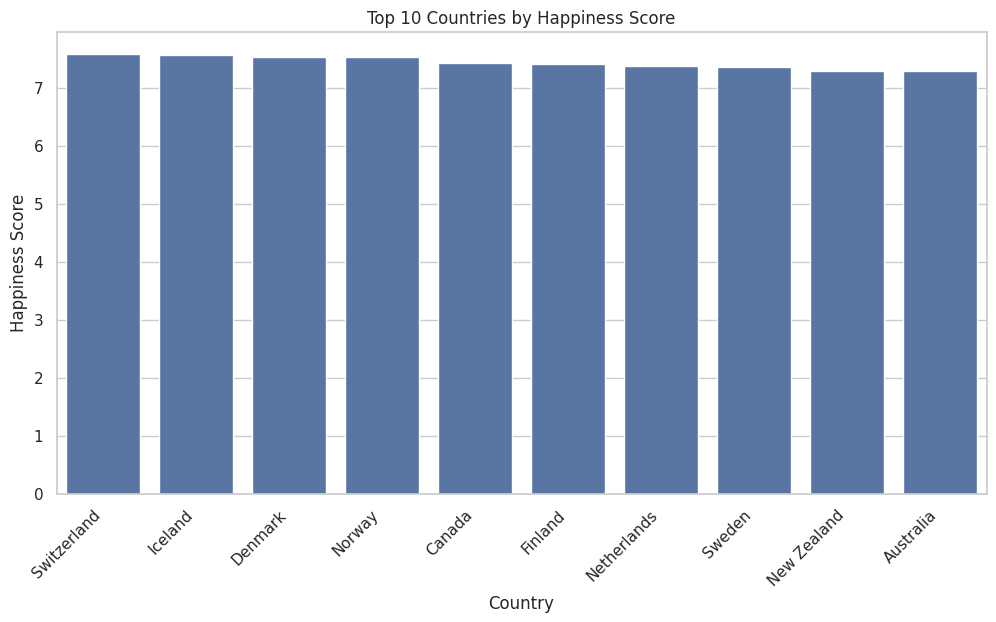

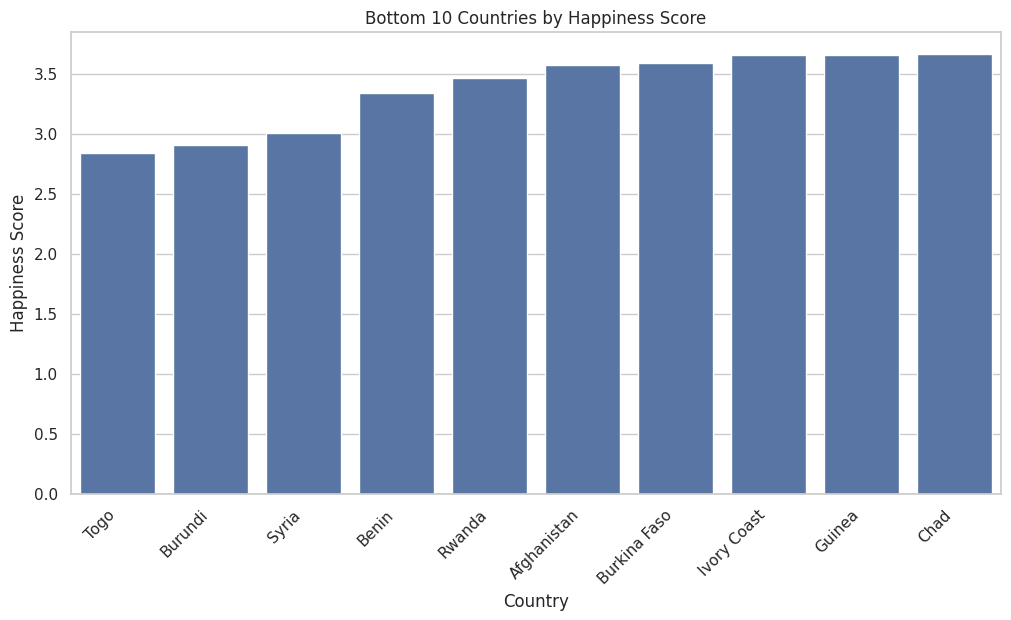

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
file_path = 'Happiness score.csv'
data = pd.read_csv(file_path)

# Set the style for the visualizations
sns.set(style="whitegrid")

# Function to plot a bar plot for the top n countries based on a specific column
def plot_top_n_bar(column, n=10):
    top_n = data.nlargest(n, column)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Country', y=column, data=top_n)
    plt.title(f'Top {n} Countries by {column}')
    plt.xlabel('Country')
    plt.ylabel(column)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Function to plot a bar plot for the bottom n countries based on a specific column
def plot_bottom_n_bar(column, n=10):
    bottom_n = data.nsmallest(n, column)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Country', y=column, data=bottom_n)
    plt.title(f'Bottom {n} Countries by {column}')
    plt.xlabel('Country')
    plt.ylabel(column)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Example: Plotting top 10 countries by Happiness Score
plot_top_n_bar('Happiness Score', n=10)

# Example: Plotting bottom 10 countries by Happiness Score
plot_bottom_n_bar('Happiness Score', n=10)


Frequency & distribution

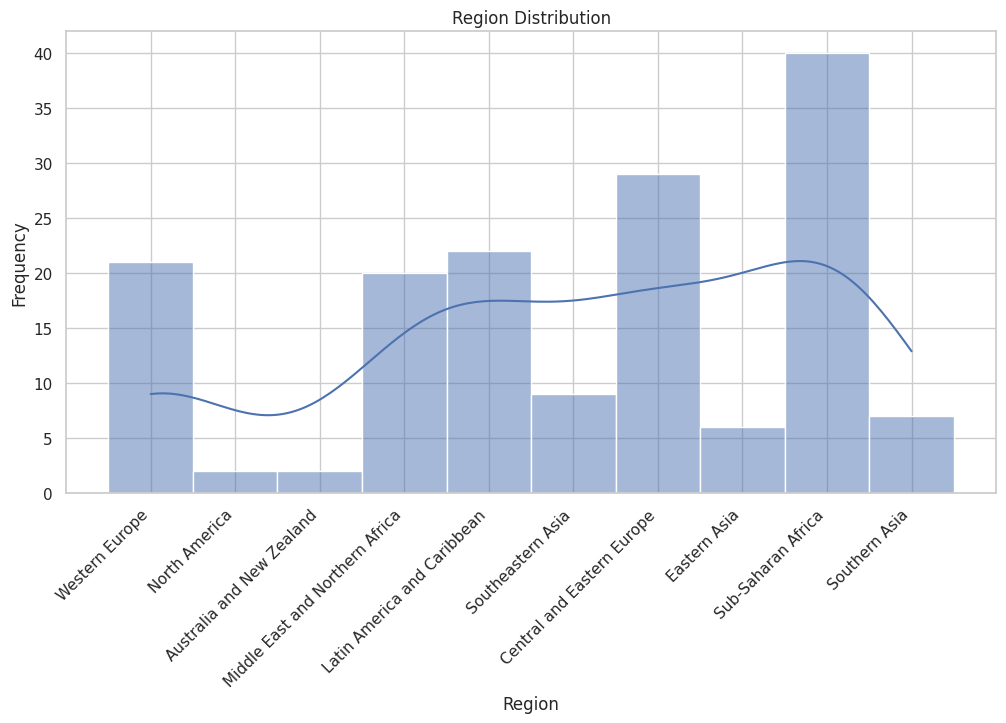

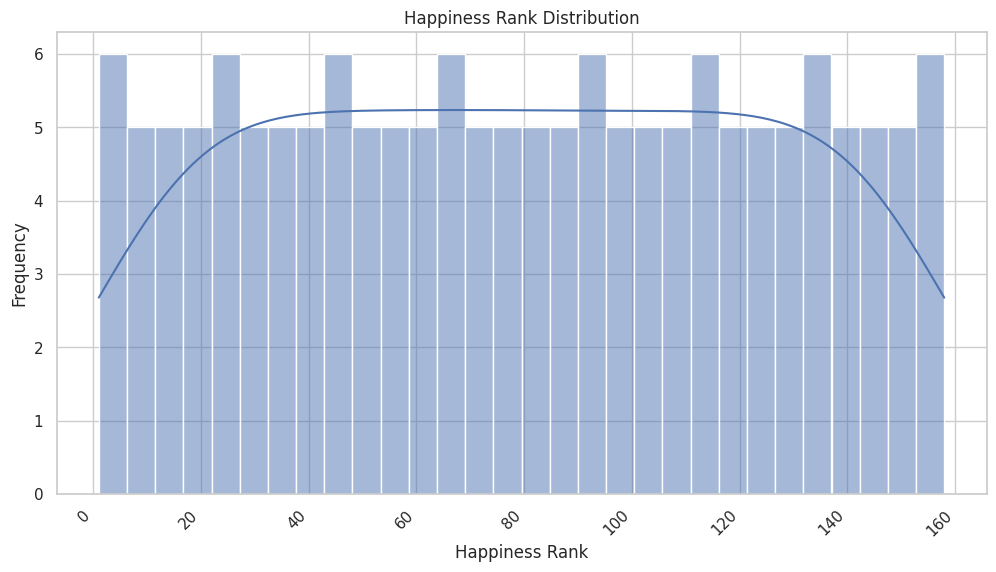

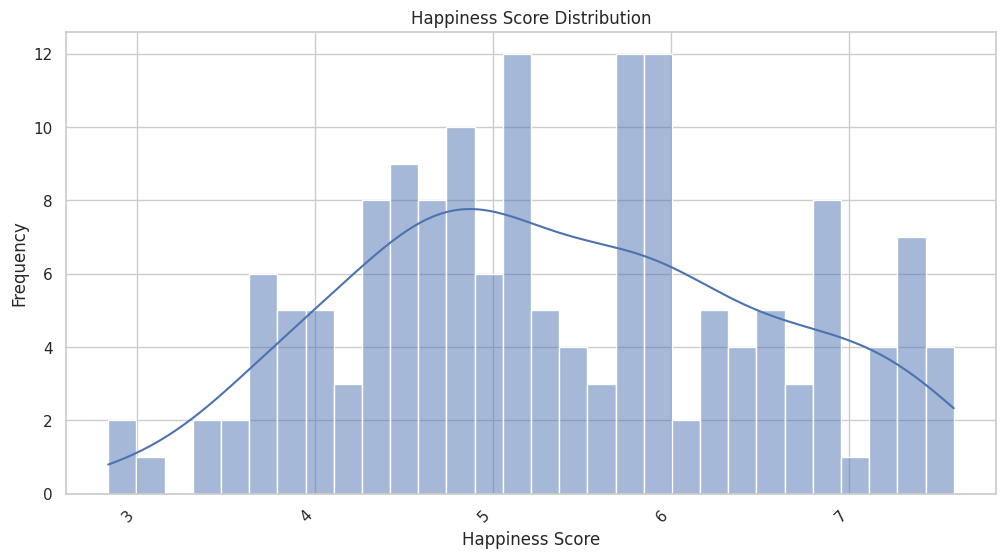

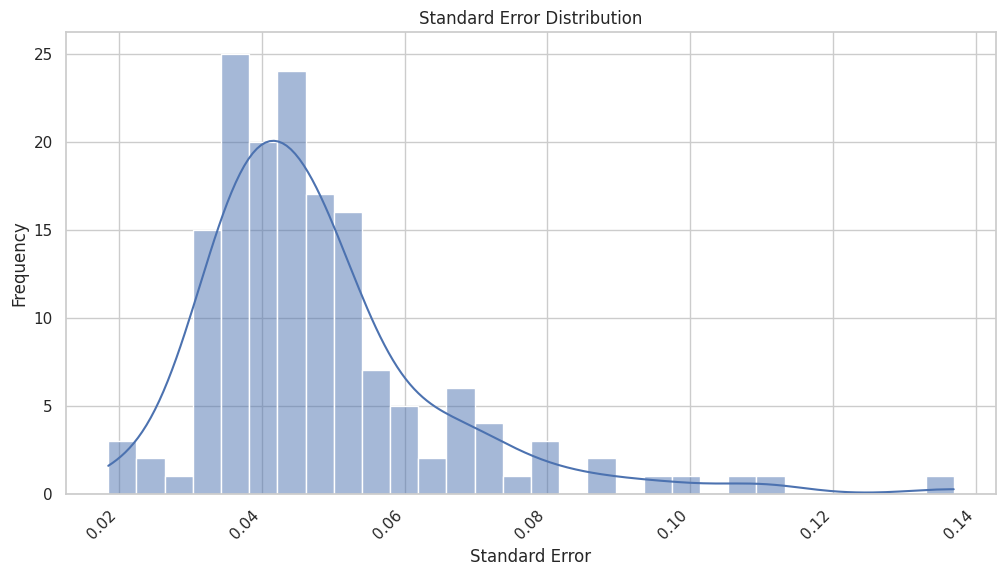

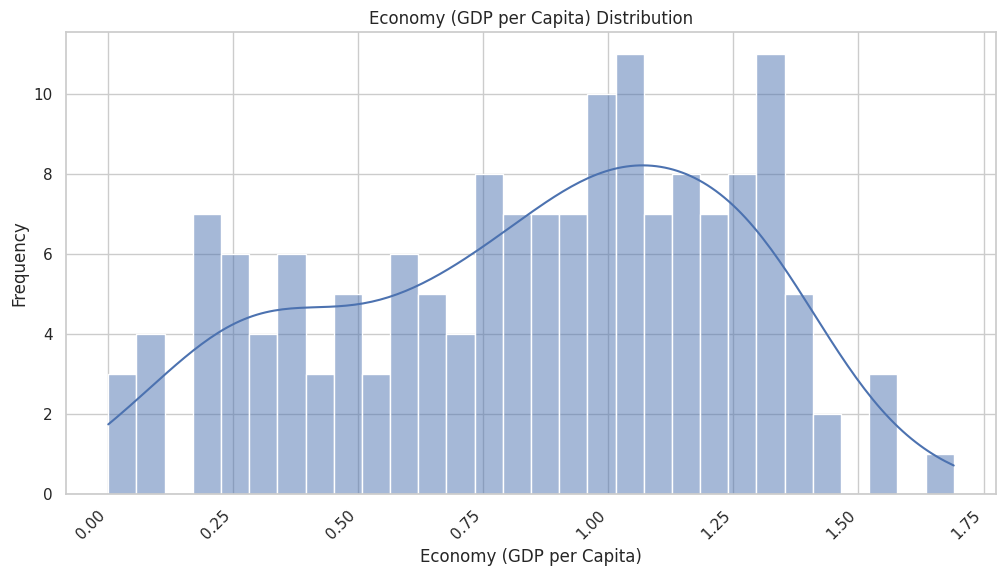

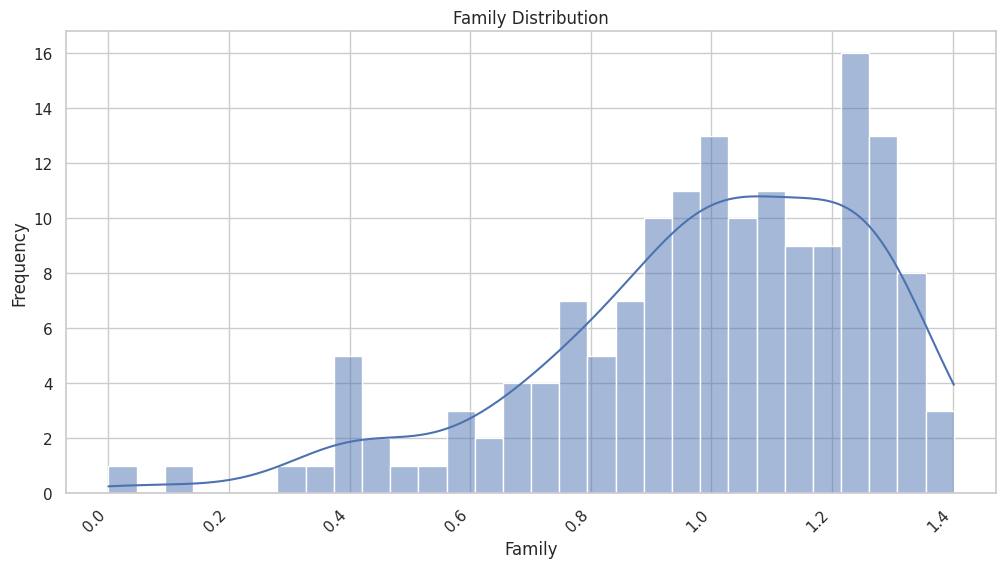

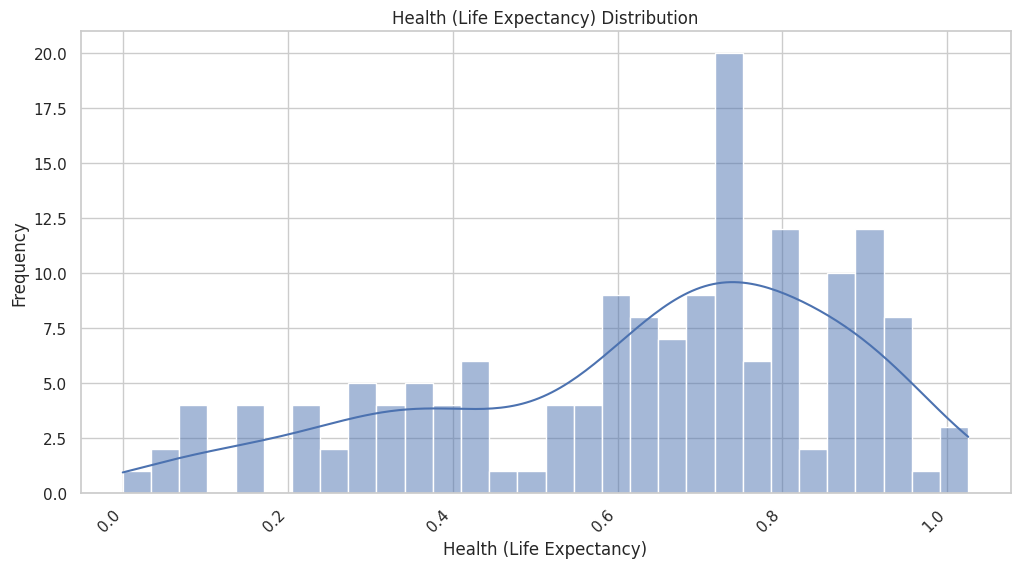

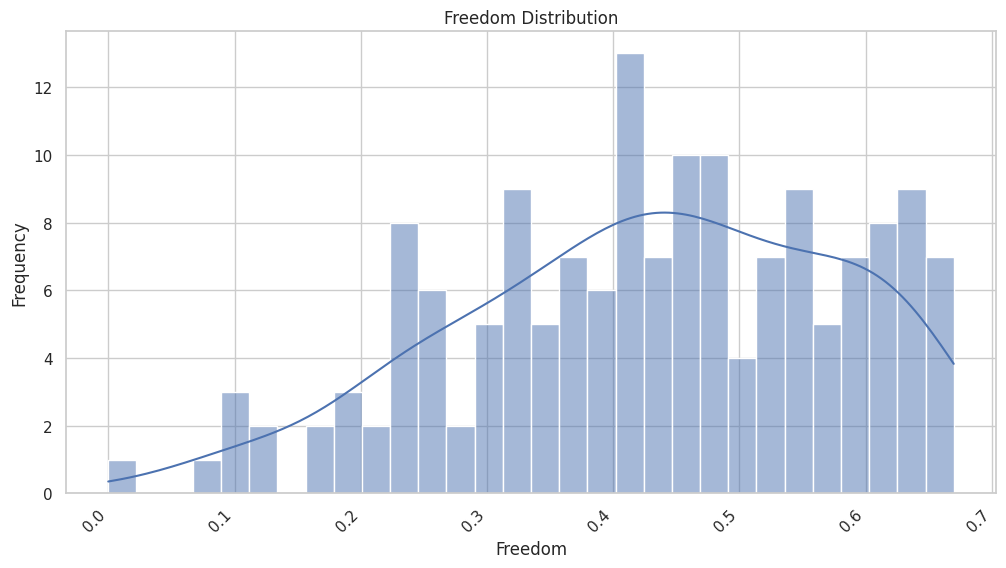

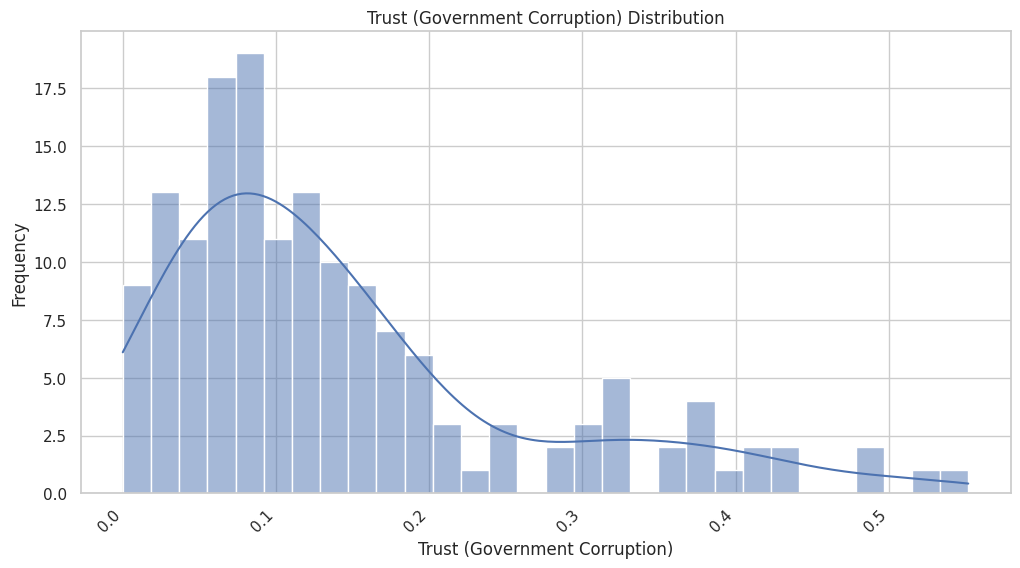

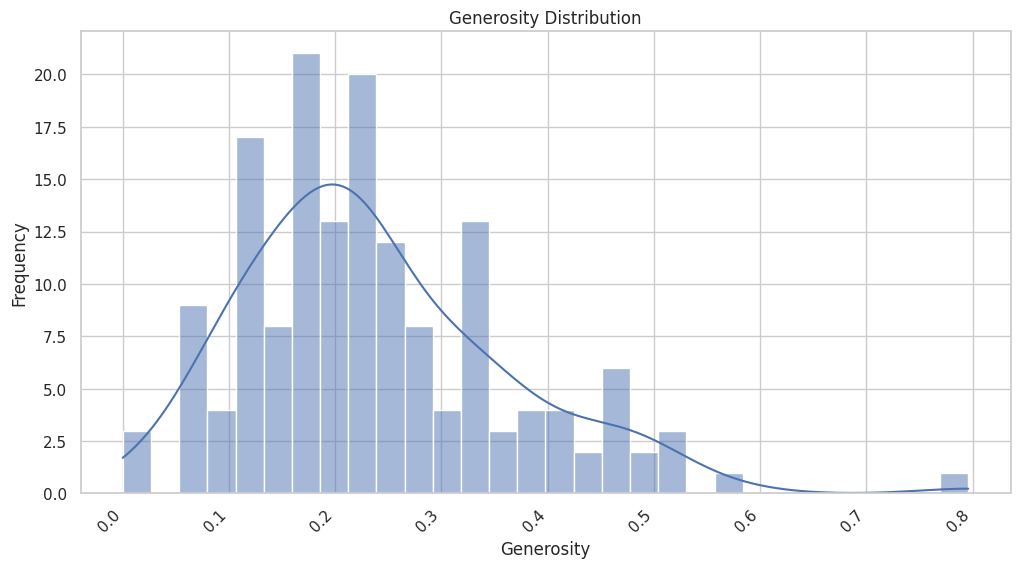

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
file_path = 'Happiness score.csv'
data = pd.read_csv(file_path)

# Set the style for the visualizations
sns.set(style="whitegrid")

# Function to plot histograms for each column
def plot_histogram(column):
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot histograms for all columns
for column in data.columns[1:]:
    plot_histogram(column)


In [13]:
sns.set(style="whitegrid", context="talk")

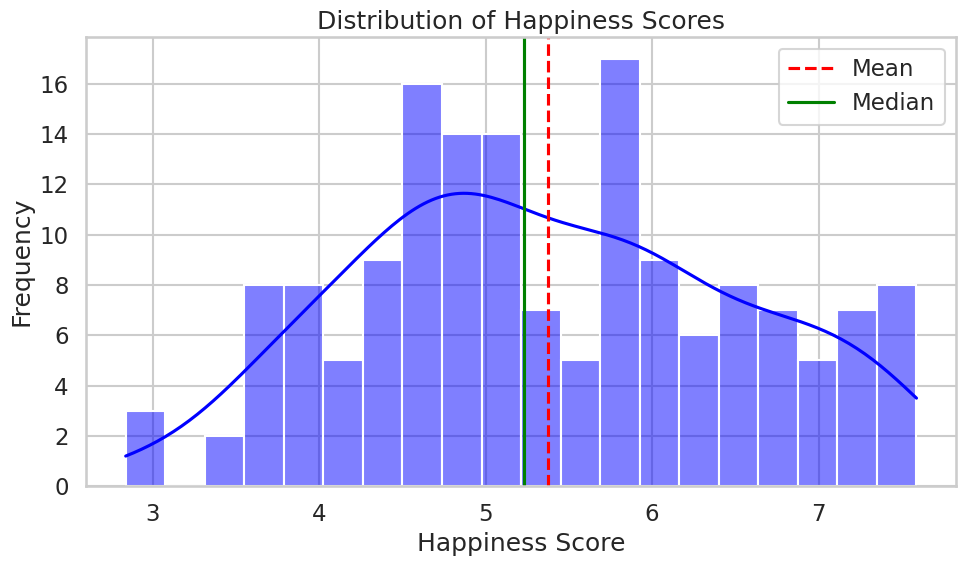

In [14]:
# Histogram: Distribution of Happiness Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Happiness Score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.axvline(data['Happiness Score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['Happiness Score'].median(), color='green', linestyle='-', label='Median')
plt.legend()
plt.tight_layout()
plt.show()

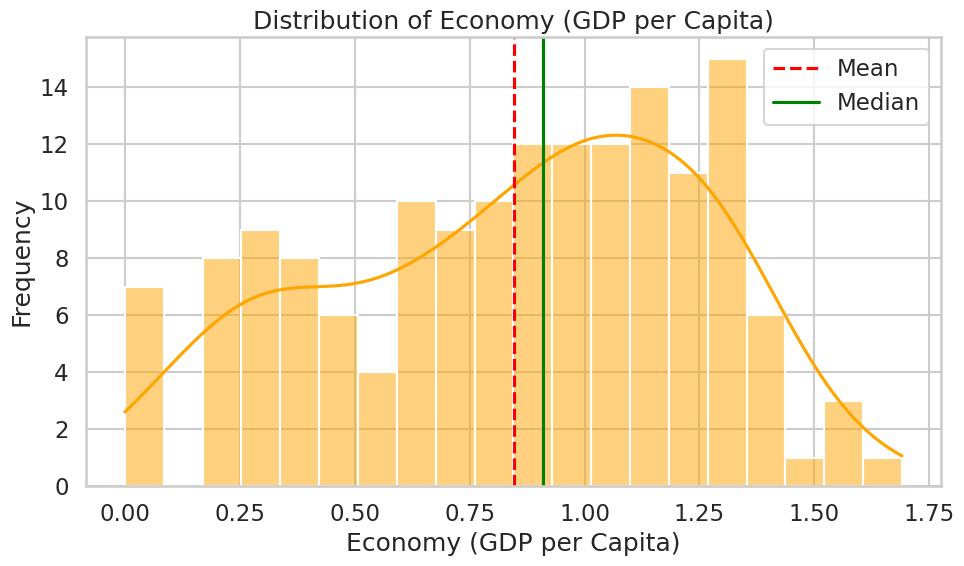

In [15]:
# Histogram: Distribution of Economy (GDP per Capita)
plt.figure(figsize=(10, 6))
sns.histplot(data['Economy (GDP per Capita)'], bins=20, kde=True, color='orange')
plt.title('Distribution of Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.axvline(data['Economy (GDP per Capita)'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['Economy (GDP per Capita)'].median(), color='green', linestyle='-', label='Median')
plt.legend()
plt.tight_layout()
plt.show()

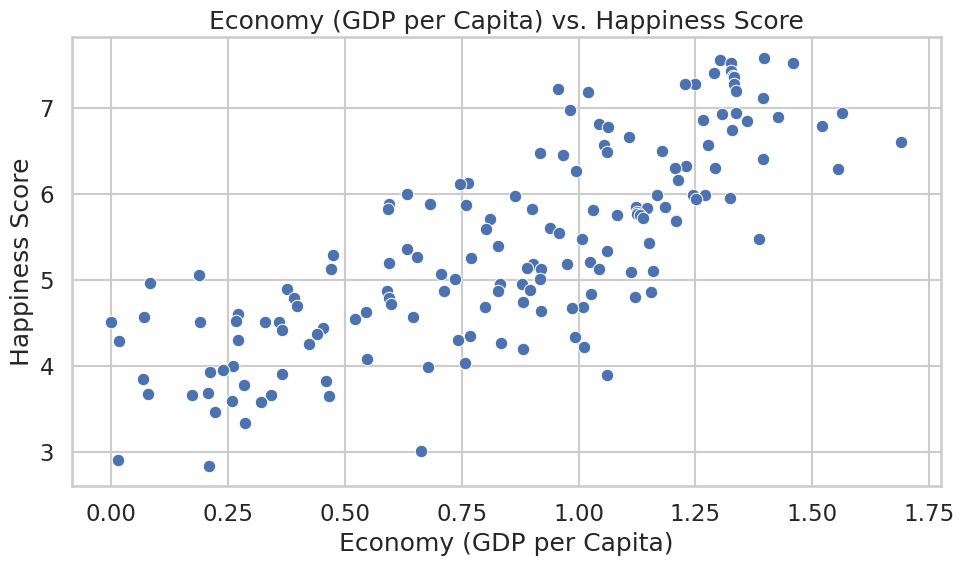

In [17]:
# 5. Scatter Plot: Economy (GDP per Capita) vs. Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=data)
plt.title('Economy (GDP per Capita) vs. Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

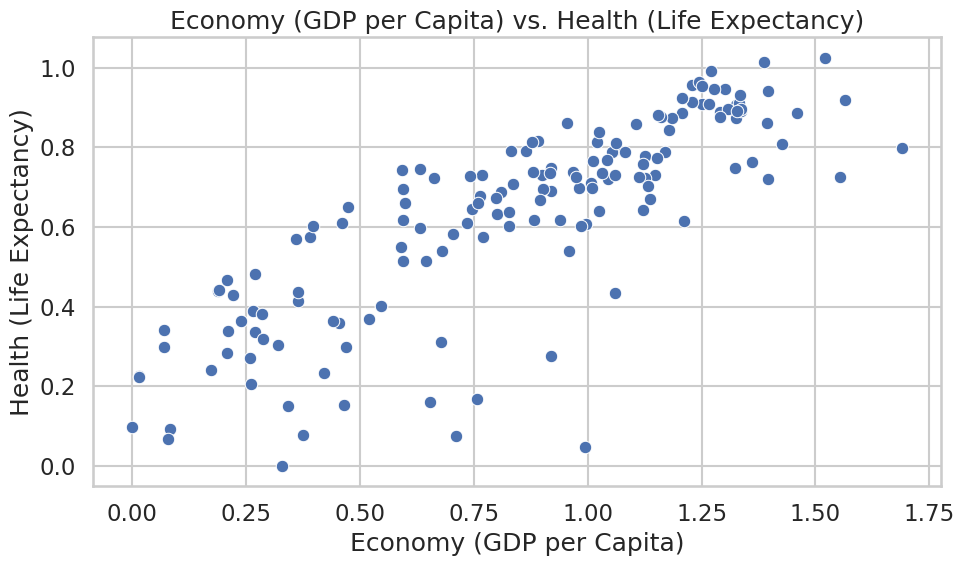

In [18]:
#  Scatter Plot: Economy (GDP per Capita) vs. Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Health (Life Expectancy)', data=data)
plt.title('Economy (GDP per Capita) vs. Health (Life Expectancy)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Health (Life Expectancy)')
plt.tight_layout()
plt.show()

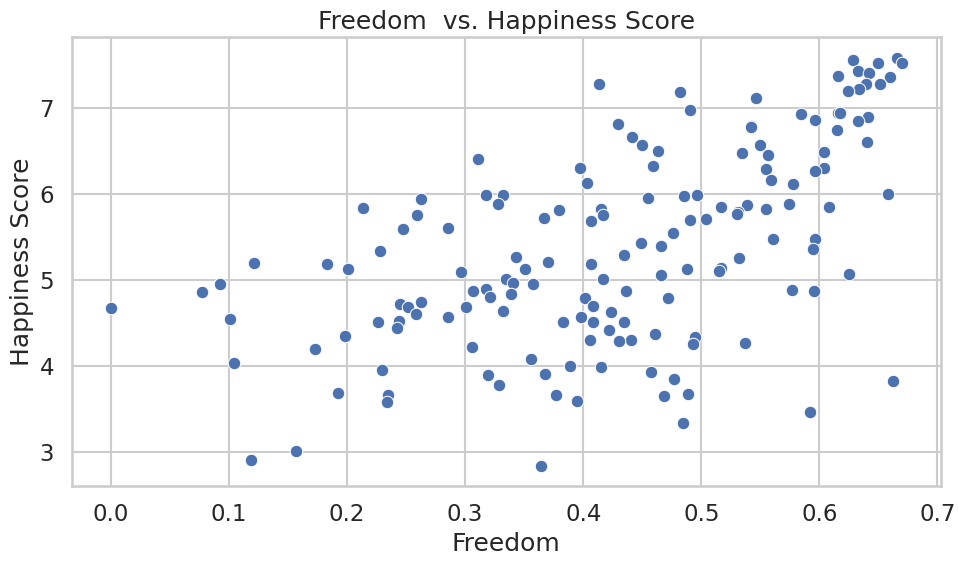

In [19]:
#  Scatter Plot: Economy (GDP per Capita) vs. Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Freedom', y='Happiness Score', data=data)
plt.title('Freedom  vs. Happiness Score')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

Correlation matrix

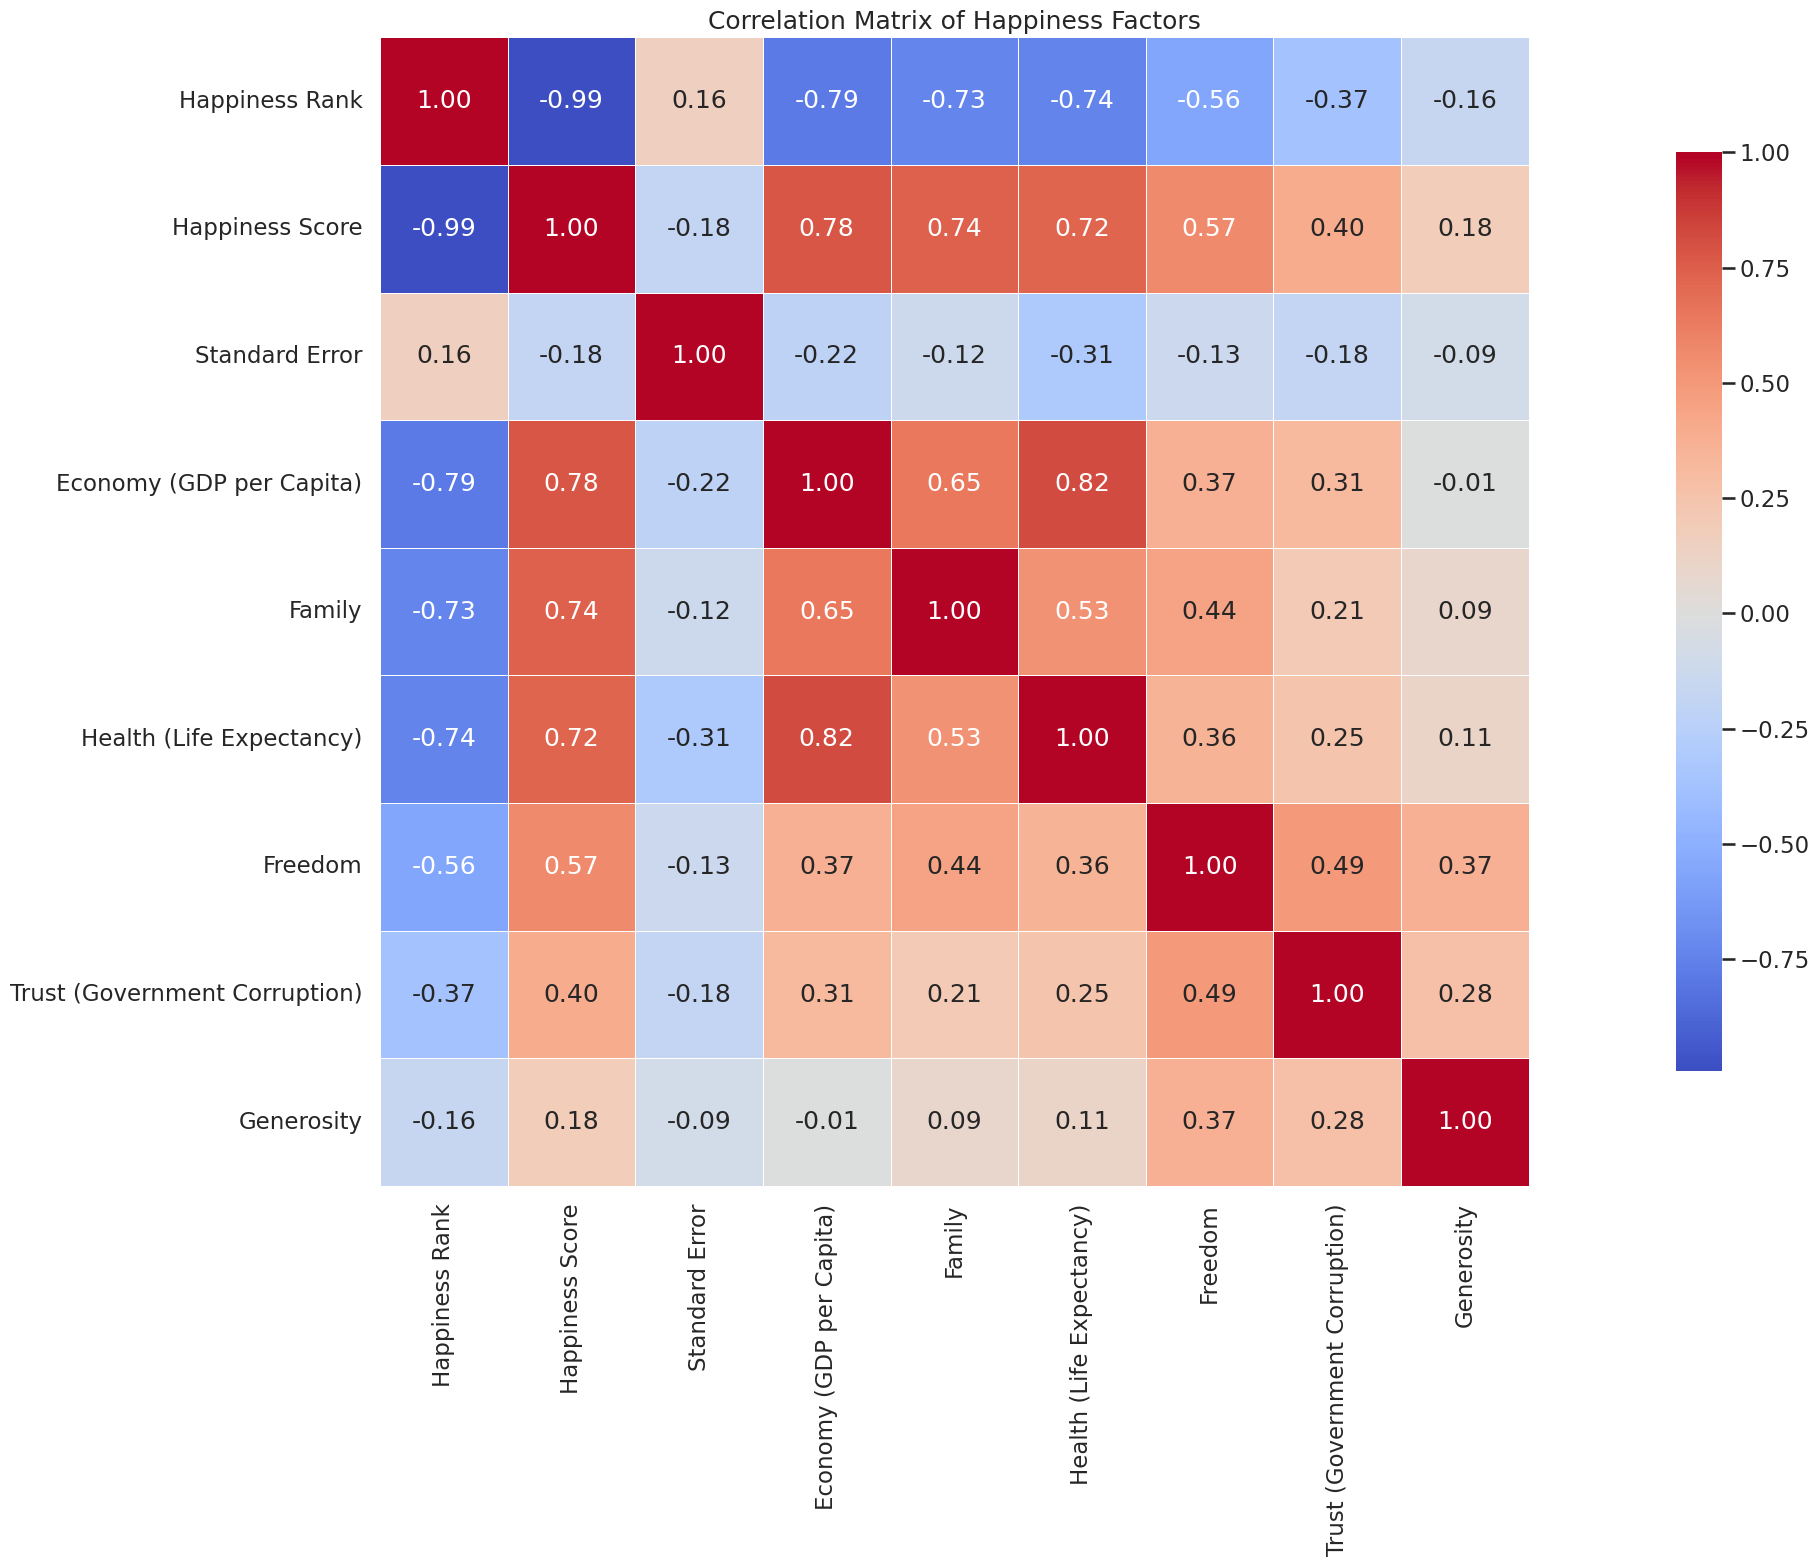

In [21]:
#  Correlation Matrix
plt.figure(figsize=(30, 16))
numeric_data = data.select_dtypes(include='number')  # Select only numeric columns
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Happiness Factors')
plt.tight_layout()
plt.show()


# **Tests**

correlation tests between 2 numeric variables

In [22]:
# Correlation Test: Happiness Score and Economy (GDP per Capita)
correlation, p_value = stats.pearsonr(data['Happiness Score'], data['Economy (GDP per Capita)'])
print(f"Correlation between Happiness Score and Economy (GDP per Capita): {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

Correlation between Happiness Score and Economy (GDP per Capita): 0.78
P-value: 1.05e-33


Hypothesis 1: Economy GDP and Health Life Expectancy
Pearson Correlation coefficient: 0.8164780030856985
P-value: 4.7752741640920634e-39



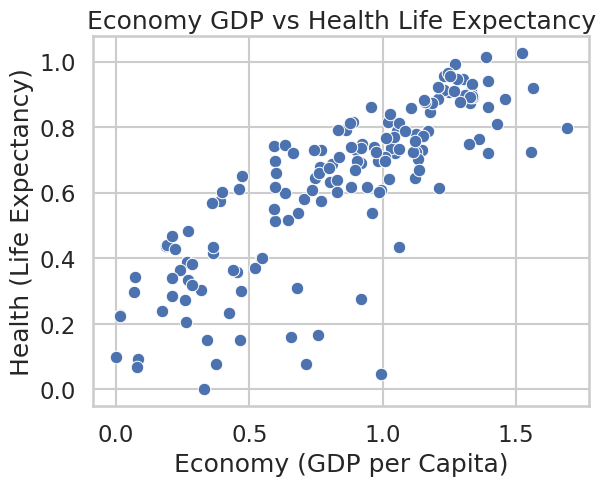

Hypothesis 2: Economy GDP and Happiness Score
Pearson Correlation coefficient: 0.7809655268660216
P-value: 1.050538413195829e-33



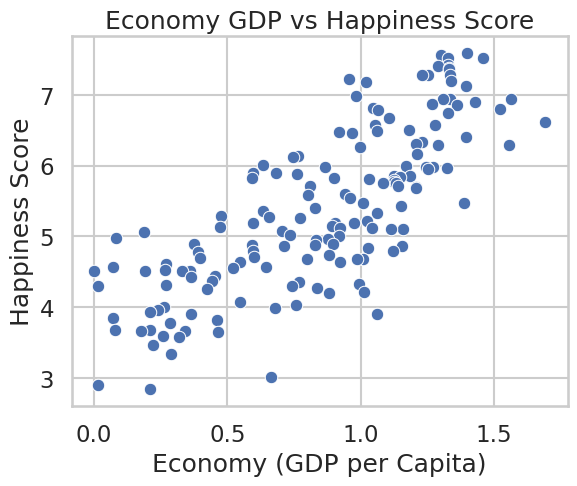

Hypothesis 3: Happiness Score and Freedom
Pearson Correlation coefficient: 0.5682109041925176
P-value: 6.8758081608469956e-15



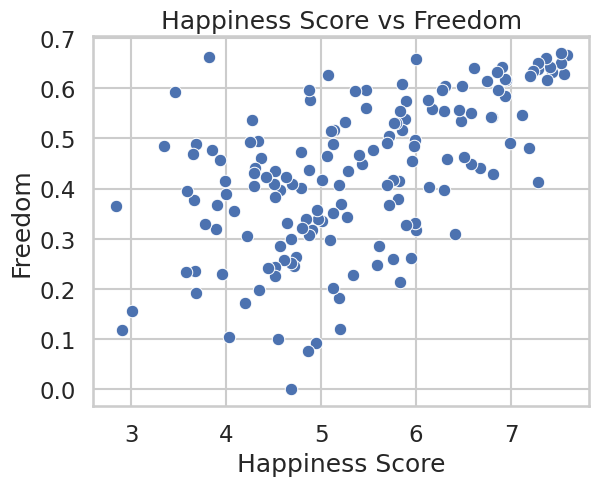

In [23]:
from scipy.stats import pearsonr


# Hypothesis 1: Correlation between Economy GDP and Health Life Expectancy
corr_coefficient, p_value = pearsonr(data['Economy (GDP per Capita)'], data['Health (Life Expectancy)'])
print(f'Hypothesis 1: Economy GDP and Health Life Expectancy')
print(f'Pearson Correlation coefficient: {corr_coefficient}')
print(f'P-value: {p_value}\n')

# Plot for Hypothesis 1
sns.scatterplot(x='Economy (GDP per Capita)', y='Health (Life Expectancy)', data=data)
plt.title('Economy GDP vs Health Life Expectancy')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Health (Life Expectancy)')
plt.show()

# Hypothesis 2: Correlation between Economy GDP and Happiness Score
corr_coefficient, p_value = pearsonr(data['Economy (GDP per Capita)'], data['Happiness Score'])
print(f'Hypothesis 2: Economy GDP and Happiness Score')
print(f'Pearson Correlation coefficient: {corr_coefficient}')
print(f'P-value: {p_value}\n')

# Plot for Hypothesis 2
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=data)
plt.title('Economy GDP vs Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

# Hypothesis 3: Correlation between Happiness Score and Freedom
corr_coefficient, p_value = pearsonr(data['Happiness Score'], data['Freedom'])
print(f'Hypothesis 3: Happiness Score and Freedom')
print(f'Pearson Correlation coefficient: {corr_coefficient}')
print(f'P-value: {p_value}\n')

# Plot for Hypothesis 3
sns.scatterplot(x='Happiness Score', y='Freedom', data=data)
plt.title('Happiness Score vs Freedom')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
plt.show()

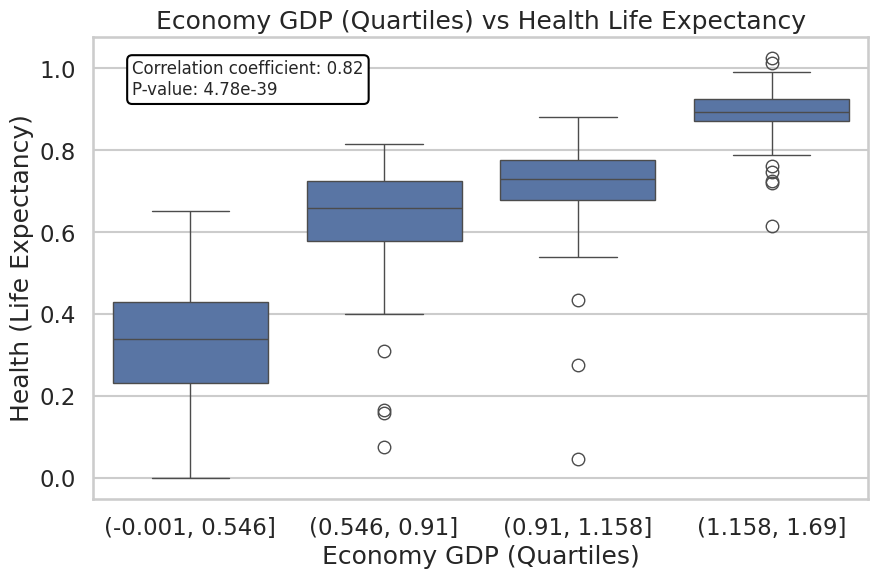

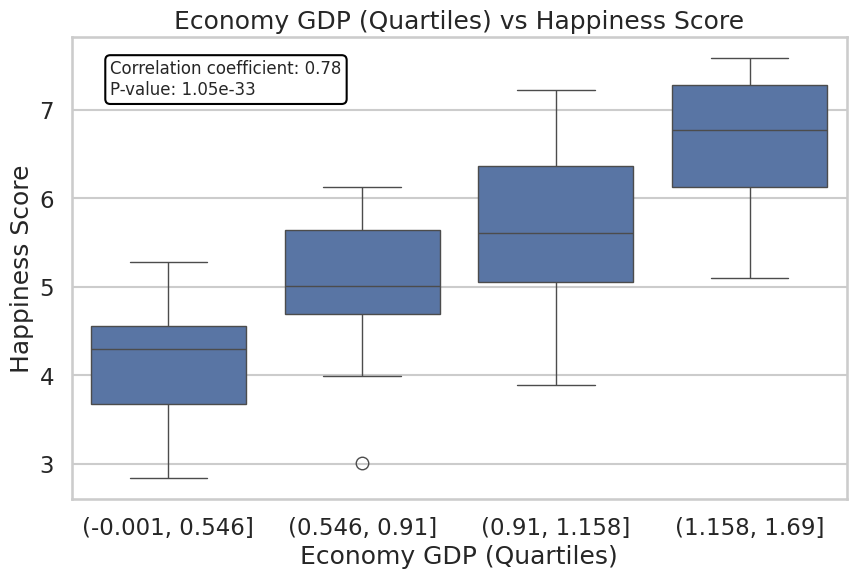

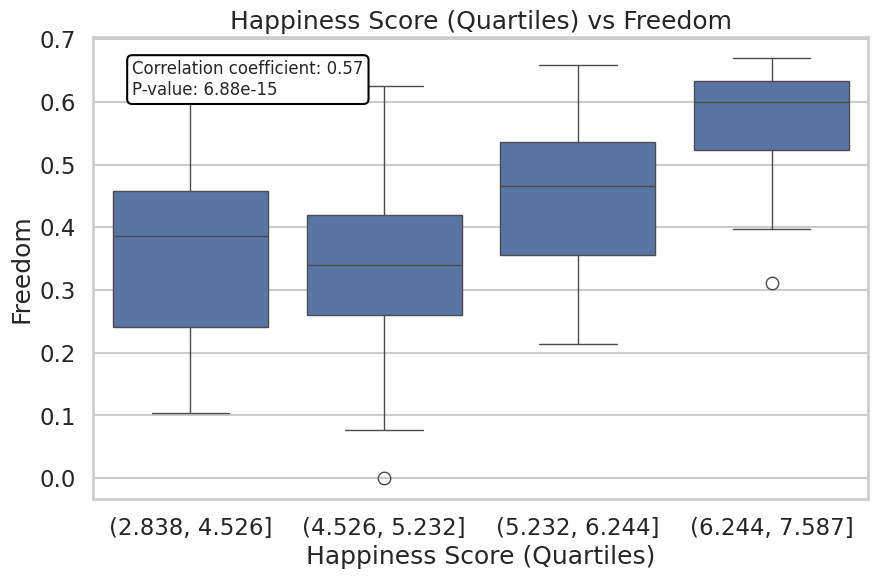

In [24]:
# Hypothesis 1: Correlation between Economy GDP and Health Life Expectancy
corr_coefficient, p_value = pearsonr(data['Economy (GDP per Capita)'], data['Health (Life Expectancy)'])

# Create box plot for Hypothesis 1
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.qcut(data['Economy (GDP per Capita)'], q=4), y='Health (Life Expectancy)', data=data)
plt.title('Economy GDP (Quartiles) vs Health Life Expectancy')
plt.xlabel('Economy GDP (Quartiles)')
plt.ylabel('Health (Life Expectancy)')
plt.annotate(f'Correlation coefficient: {corr_coefficient:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.show()

# Hypothesis 2: Correlation between Economy GDP and Happiness Score
corr_coefficient, p_value = pearsonr(data['Economy (GDP per Capita)'], data['Happiness Score'])

# Create box plot for Hypothesis 2
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.qcut(data['Economy (GDP per Capita)'], q=4), y='Happiness Score', data=data)
plt.title('Economy GDP (Quartiles) vs Happiness Score')
plt.xlabel('Economy GDP (Quartiles)')
plt.ylabel('Happiness Score')
plt.annotate(f'Correlation coefficient: {corr_coefficient:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.show()

# Hypothesis 3: Correlation between Happiness Score and Freedom
corr_coefficient, p_value = pearsonr(data['Happiness Score'], data['Freedom'])

# Create box plot for Hypothesis 3
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.qcut(data['Happiness Score'], q=4), y='Freedom', data=data)
plt.title('Happiness Score (Quartiles) vs Freedom')
plt.xlabel('Happiness Score (Quartiles)')
plt.ylabel('Freedom')
plt.annotate(f'Correlation coefficient: {corr_coefficient:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.show()

z-test

In [25]:
# Extract data for two regions
region1 = data[data['Region'] == 'Western Europe']['Happiness Score']
region2 = data[data['Region'] == 'Sub-Saharan Africa']['Happiness Score']

# Calculate sample means and standard deviations
mean1 = np.mean(region1)
mean2 = np.mean(region2)
std1 = np.std(region1, ddof=1)  # Sample standard deviation (ddof=1)
std2 = np.std(region2, ddof=1)

# Calculate sample sizes
n1 = len(region1)
n2 = len(region2)

# Calculate the Z statistic
z_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"Z-test between Western Europe and Sub-Saharan Africa Happiness Scores")
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.2e}")


Z-test between Western Europe and Sub-Saharan Africa Happiness Scores
Z-statistic: 12.18
P-value: 0.00e+00


Anova test

ANOVA Test for GDP Group and Happiness Score: F-statistic = 86.60, P-value = 0.0000
ANOVA Test for Health Group and Happiness Score: F-statistic = 67.73, P-value = 0.0000
ANOVA Test for Freedom Group and Happiness Score: F-statistic = 24.75, P-value = 0.0000


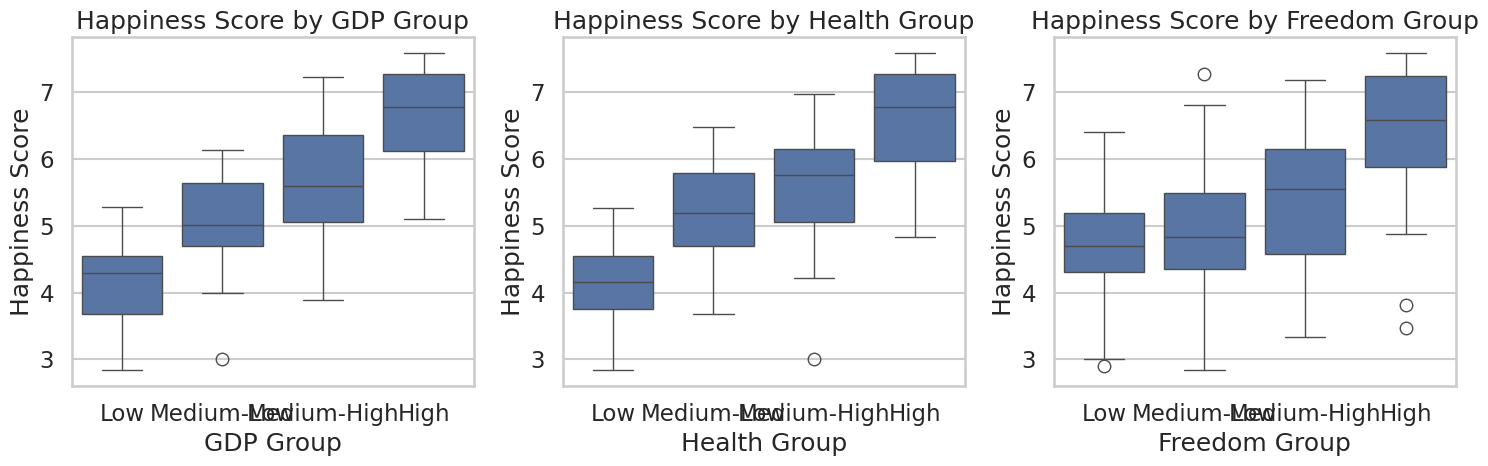

In [26]:
# Categorize Economy (GDP per Capita), Health (Life Expectancy), and Freedom into quartiles
data['GDP_Group'] = pd.qcut(data['Economy (GDP per Capita)'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
data['Health_Group'] = pd.qcut(data['Health (Life Expectancy)'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
data['Freedom_Group'] = pd.qcut(data['Freedom'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# ANOVA test for each factor with Happiness Score
anova_gdp = f_oneway(data.loc[data['GDP_Group'] == 'Low', 'Happiness Score'],
                     data.loc[data['GDP_Group'] == 'Medium-Low', 'Happiness Score'],
                     data.loc[data['GDP_Group'] == 'Medium-High', 'Happiness Score'],
                     data.loc[data['GDP_Group'] == 'High', 'Happiness Score'])

anova_health = f_oneway(data.loc[data['Health_Group'] == 'Low', 'Happiness Score'],
                        data.loc[data['Health_Group'] == 'Medium-Low', 'Happiness Score'],
                        data.loc[data['Health_Group'] == 'Medium-High', 'Happiness Score'],
                        data.loc[data['Health_Group'] == 'High', 'Happiness Score'])

anova_freedom = f_oneway(data.loc[data['Freedom_Group'] == 'Low', 'Happiness Score'],
                         data.loc[data['Freedom_Group'] == 'Medium-Low', 'Happiness Score'],
                         data.loc[data['Freedom_Group'] == 'Medium-High', 'Happiness Score'],
                         data.loc[data['Freedom_Group'] == 'High', 'Happiness Score'])

# Print the ANOVA results
print(f"ANOVA Test for GDP Group and Happiness Score: F-statistic = {anova_gdp.statistic:.2f}, P-value = {anova_gdp.pvalue:.4f}")
print(f"ANOVA Test for Health Group and Happiness Score: F-statistic = {anova_health.statistic:.2f}, P-value = {anova_health.pvalue:.4f}")
print(f"ANOVA Test for Freedom Group and Happiness Score: F-statistic = {anova_freedom.statistic:.2f}, P-value = {anova_freedom.pvalue:.4f}")

# Box plots to visualize the group distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='GDP_Group', y='Happiness Score', data=data)
plt.title('Happiness Score by GDP Group')
plt.xlabel('GDP Group')
plt.ylabel('Happiness Score')

plt.subplot(1, 3, 2)
sns.boxplot(x='Health_Group', y='Happiness Score', data=data)
plt.title('Happiness Score by Health Group')
plt.xlabel('Health Group')
plt.ylabel('Happiness Score')

plt.subplot(1, 3, 3)
sns.boxplot(x='Freedom_Group', y='Happiness Score', data=data)
plt.title('Happiness Score by Freedom Group')
plt.xlabel('Freedom Group')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

In [27]:
# 10. ANOVA Test: Testing for Differences in Happiness Scores Across All Regions
anova_result = stats.f_oneway(*[group['Happiness Score'].values for name, group in data.groupby('Region')])
print(f"ANOVA test for differences in Happiness Scores across regions")
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.2e}")

ANOVA test for differences in Happiness Scores across regions
F-statistic: 24.76
P-value: 1.75e-25


In [28]:
from sklearn.preprocessing import LabelEncoder

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

# Prepare a list to store the results
anova_results = []

# Define the target column for comparison (Happiness Score)
target_column = 'Happiness Score'

# Iterate over each column in the dataframe except the target column
for column in df.columns:
    if column != target_column:
        # Check if the column is categorical or numerical
        if df[column].dtype == 'object' or len(df[column].unique()) < 10:
            # Convert categorical columns to numeric using LabelEncoder
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])

        # Split the data into groups based on the target column (Happiness Score)
        # For this, we'll first group the Happiness Score into bins (e.g., quartiles)
        df['Happiness_Group'] = pd.qcut(df[target_column], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
        groups = [df[df['Happiness_Group'] == group][column] for group in df['Happiness_Group'].unique()]

        # Perform the one-way ANOVA
        f_val, p_val = f_oneway(*groups)

        # Store the result
        anova_results.append((column, f_val, p_val))

# Print the results
for column, f_val, p_val in anova_results:
    print(f"ANOVA for {column} and {target_column}:")
    print(f"F-Value: {f_val:.2f}")
    print(f"P-Value: {p_val:.4f}\n")

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

# Simple linear regression

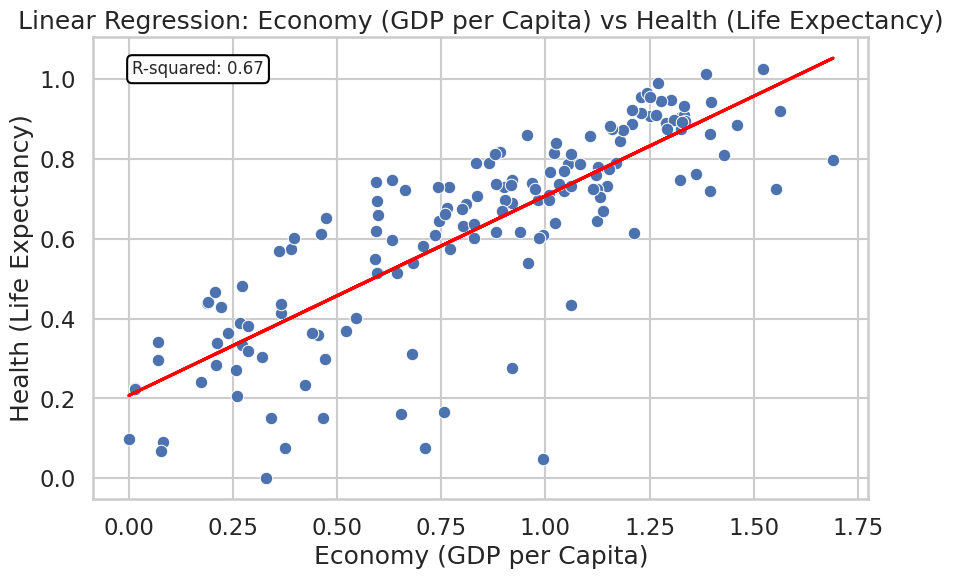

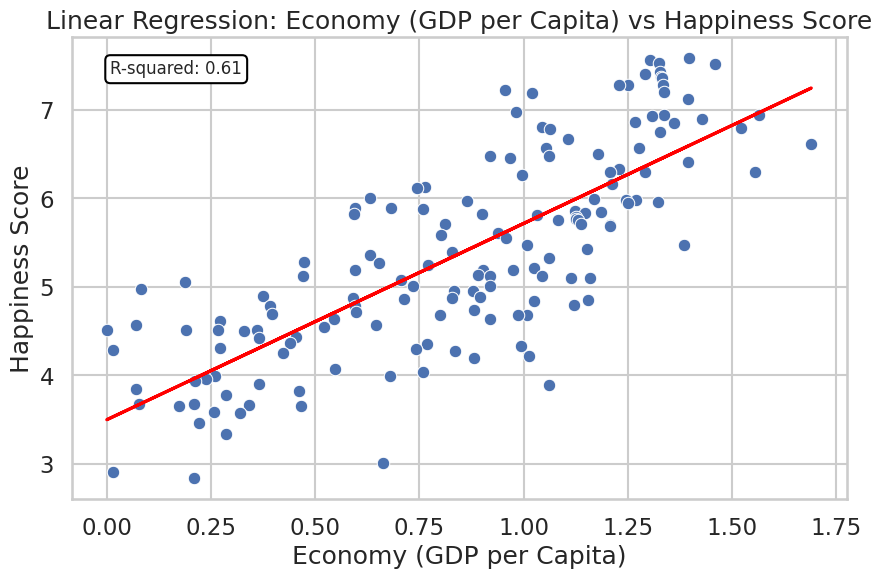

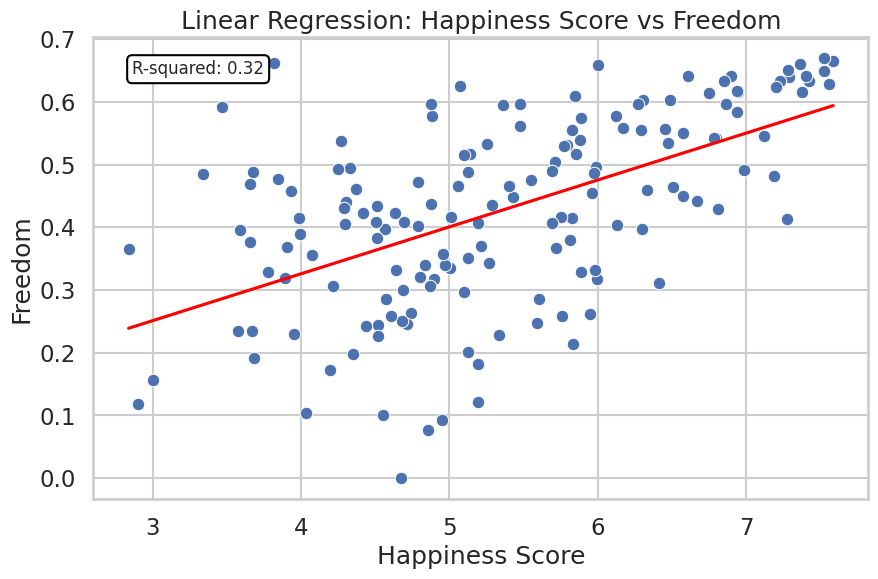

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Hypothesis 1: Economy (GDP per Capita) vs Health (Life Expectancy)
X = data[['Economy (GDP per Capita)']]
y = data['Health (Life Expectancy)']

# Fit the linear regression model
model1 = LinearRegression()
model1.fit(X, y)
predictions1 = model1.predict(X)

# Calculate R-squared value
r2_1 = r2_score(y, predictions1)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Health (Life Expectancy)', data=data)
plt.plot(data['Economy (GDP per Capita)'], predictions1, color='red')
plt.title('Linear Regression: Economy (GDP per Capita) vs Health (Life Expectancy)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Health (Life Expectancy)')
plt.annotate(f'R-squared: {r2_1:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.show()

# Hypothesis 2: Economy (GDP per Capita) vs Happiness Score
X = data[['Economy (GDP per Capita)']]
y = data['Happiness Score']

# Fit the linear regression model
model2 = LinearRegression()
model2.fit(X, y)
predictions2 = model2.predict(X)

# Calculate R-squared value
r2_2 = r2_score(y, predictions2)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=data)
plt.plot(data['Economy (GDP per Capita)'], predictions2, color='red')
plt.title('Linear Regression: Economy (GDP per Capita) vs Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.annotate(f'R-squared: {r2_2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.show()

# Hypothesis 3: Happiness Score vs Freedom
X = data[['Happiness Score']]
y = data['Freedom']

# Fit the linear regression model
model3 = LinearRegression()
model3.fit(X, y)
predictions3 = model3.predict(X)

# Calculate R-squared value
r2_3 = r2_score(y, predictions3)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Happiness Score', y='Freedom', data=data)
plt.plot(data['Happiness Score'], predictions3, color='red')
plt.title('Linear Regression: Happiness Score vs Freedom')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
plt.annotate(f'R-squared: {r2_3:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.show()
